In [1]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
import math
import numpy as np

## 1.

In [2]:
W = [[5, 3, 0, 0],
     [0, 1, 8, 4]]
V = [[0, 6], 
     [6, 0]]
a = [0, 4, 6, 10]
b = [2, 0, 8, 4]
n = 2
m = 4

### (a)
#### Non-linear Form
##### Decision Variables
$x_j, y_j, \forall j \in \text{facilities}$: 新據點的兩軸座標
##### Model
$\text{min}f_1 + f_2$  
x-axis: $f_1 = \displaystyle{\sum_{1 \leq j < k \leq n} v_{jk} |x_j - x_k| + \sum_{j=1}^{n} \sum_{i=1}^{m}w_{ji}}|x_j-a_i|$  
y-axis: $f_2 = \displaystyle{\sum_{1 \leq j < k \leq n} v_{jk} |y_j - y_k| + \sum_{j=1}^{n} \sum_{i=1}^{m}w_{ji}}|y_j-b_i|$  
$\text{s.t.}$  
$x_j, y_j \geq 0, \forall j \in \text{facilities}$
#### Linear Form
##### Decision Variables
$x_j, y_j, \forall j \in \text{facilities}$: 新據點的兩軸座標  
$p^X_{jk}$: 新據點j到新據點k在x軸上的左邊幾單位  
$q^X_{jk}$: 新據點j到新據點k在x軸上的右邊幾單位  
$r^X_{ji}$: 新據點j到舊據點i在x軸上的右邊幾單位  
$s^X_{ji}$: 新據點j到舊據點i在x軸上的左邊幾單位  
$p^Y_{jk}$: 新據點j到新據點k在y軸上的左邊幾單位  
$q^Y_{jk}$: 新據點j到新據點k在y軸上的右邊幾單位  
$r^Y_{ji}$: 新據點j到舊據點i在y軸上的右邊幾單位  
$s^Y_{ji}$: 新據點j到舊據點i在y軸上的左邊幾單位 
##### Model
$\text{min}f_1^\prime + f_2^\prime$, where  
x-axis: $f_1^\prime = \displaystyle{\sum_{1 \leq j < k \leq n} v_{jk} (p^X_{jk} + q^X_{jk}) + \sum_{j=1}^{n} \sum_{i=1}^{m}w_{ji}(r^X_{ji} + s^X_{ji})}$  
y-axis: $f_2^\prime = \displaystyle{\sum_{1 \leq j < k \leq n} v_{jk} (p^Y_{jk} + q^Y_{jk}) + \sum_{j=1}^{n} \sum_{i=1}^{m}w_{ji}(r^Y_{ji} + s^Y_{ji})}$  
$\text{s.t.}$  
$x_j - q^X_{jk} + p^X_{jk} = x_k, 1 \leq j < k \leq n$  
$x_j - r^X_{ji} + s^X_{ji} = a_i, 1 \leq i \leq m, 1 \leq j \leq n$  
$y_j - q^Y_{jk} + p^Y_{jk} = y_k, 1 \leq j < k \leq n$  
$y_j - r^Y_{ji} + s^Y_{ji} = b_i, 1 \leq i \leq m, 1 \leq j \leq n$  
$x_j, x_k, r^X_{ji}, s^X_{ji}, q^X_{jk}, p^X_{jk}, y_j, y_k, r^Y_{ji}, s^Y_{ji}, q^Y_{jk}, p^Y_{jk} \geq 0, \forall j \in \text{facilities}$  
### (b)

In [3]:
model = gp.Model("FLP")

Academic license - for non-commercial use only - expires 2021-05-28
Using license file /home/cu2189191862/gurobi.lic


In [4]:
x = model.addVars(2, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="x")
y = model.addVars(2, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="y")
p_X = model.addVars(2, 2, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="p_X")
q_X = model.addVars(2, 2, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="q_X")
r_X = model.addVars(2, 4, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="r_X")
s_X = model.addVars(2, 4, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="s_X")
p_Y = model.addVars(2, 2, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="p_Y")
q_Y = model.addVars(2, 2, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="q_Y")
r_Y = model.addVars(2, 4, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="r_Y")
s_Y = model.addVars(2, 4, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="s_Y")


In [5]:
f_prime1 = gp.quicksum(V[j][k] * (p_X[j, k] + q_X[j, k]) for j in range(n) for k in range(n) if j < k) + \
           gp.quicksum(W[j][i] * (r_X[j, i] + s_X[j, i]) for j in range(n) for i in range(m))
f_prime2 = gp.quicksum(V[j][k] * (p_Y[j, k] + q_Y[j, k]) for j in range(n) for k in range(n) if j < k) + \
           gp.quicksum(W[j][i] * (r_Y[j, i] + s_Y[j, i]) for j in range(n) for i in range(m))

model.setObjective(f_prime1 + f_prime2, GRB.MINIMIZE)

In [6]:
model.addConstrs(x[j] - q_X[j, k] + p_X[j, k] - x[k] == 0 for j in range(n) for k in range(n) if j < k)
model.addConstrs(x[j] - r_X[j, i] + s_X[j, i] == a[i] for j in range(n) for i in range(m))
model.addConstrs(y[j] - q_Y[j, k] + p_Y[j, k] == y[k] for j in range(n) for k in range(n) if j < k)
model.addConstrs(y[j] - r_Y[j, i] + s_Y[j, i] == b[i] for j in range(n) for i in range(m))

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>}

In [7]:
model.write('q1.lp')

model.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 32 physical cores, 64 logical processors, using up to 32 threads
Optimize a model with 18 rows, 52 columns and 56 nonzeros
Model fingerprint: 0x118aeb53
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 8e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+01]
Presolve removed 9 rows and 30 columns
Presolve time: 0.01s
Presolved: 9 rows, 22 columns, 29 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.800000e+01   0.000000e+00      0s
       8    1.0400000e+02   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.01 seconds
Optimal objective  1.040000000e+02


### (c)

In [8]:
for j in range(n):
    print("new facility {} located at: ({}, {})".format(j, model.getAttr('x', x)[j], model.getAttr('x', y)[j]))

print("objective value:", model.objVal)


new facility 0 located at: (4.0, 2.0)
new facility 1 located at: (6.0, 4.0)
objective value: 104.0


黑色的點是舊的據點，藍色是新的


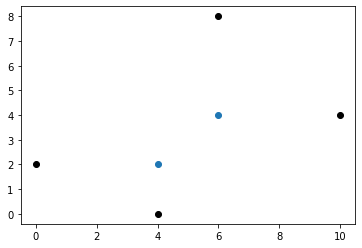

In [9]:
import matplotlib.pyplot as plt

xs = list()
ys = list()
for j in range(n):
    xs.append(model.getAttr('x', x)[j])
    ys.append(model.getAttr('x', y)[j])

plt.scatter(xs, ys)
plt.scatter(a, b, c='k')
print("黑色的點是舊的據點，藍色是新的")



## 2.
### (a)
令在$x$右邊的點的集合為$R$，在$x$左邊的點的集合為$L$，$W_i$為到點$i$的權重  
則$x$每向右$1$單位，相對於每個在右處的點的距離都會下降$1$單位、每個在左處的點的距離都會上升$1$單位，  
根據斜率的定義：$x$每向右一單位，$f(x)$的改變量  
可以得知，以每個點的相對改變量乘上$W_i$的和就是斜率：$\displaystyle{\text{slope} = \sum_{i \in L}W_i - \sum_{i \in R}W_i}$  

### (b)
因為這是一個convex function，亦即函數上的任意兩點連線段必在函數的上方，所以最佳解所在的位置會在斜率的正負號轉折之處(Optimality properties is because of the convexity of the function)，綜合(a)題的結論，我們知道函數的最低點必定是向右的weight與向左的weight抵銷到為$0$的情況，也就是在這個點才會發生斜率的正負號轉折。





## 3.
4個長為8寬為16、5個長為9寬為9、3個長為18寬為3的長方形
### (a)


#### Variables
$x$：總所需面積的$x$軸長度  
$y$：總所需面積的$y$軸長度  
$x_i^\prime$：長方形$i$的中心點和原點沿著$x$軸的距離，$i \in \text{rectangles}$  
$y_i^\prime$：長方形$i$的中心點和原點沿著$y$軸的距離，$i \in \text{rectangles}$  
$s_i$：長方形$i$的方向，$1$為$p$軸平行$x$軸，$0$為$p$軸平行$y$軸，$i \in \text{rectangles}$  
$u_{ik}, v_{ik}$：分別表示長方形$i$與長方形$k$之間的平行與垂直相對位置，$i, k \in \text{rectangles}, i \neq k$  
$\alpha^X_j, \beta^X_j$：對$\text{ln }x$線性化所需的變數，$2 \leq j \leq m^X$  
$\alpha^Y_j, \beta^Y_j$：對$\text{ln }y$線性化所需的變數，$2 \leq j \leq m^Y$  


#### Model
$\displaystyle{\text{min } \text{ln }a_1 + t^X_1(x - a_1) + \sum_{j=2}^{m^X-1}(t^X_j - t^X_{j-1})(a_j \alpha^X_j + x - a_j - \beta^X_j) + \text{ln }b_1 + t^Y_1(y - b_1) + \sum_{j=2}^{m^Y-1}(t^Y_j - t^Y_{j-1})(b_j \alpha^Y_j + y - b_j - \beta^Y_j)}$  
$\text{s.t.}$  
$- \bar{x} \alpha^X_j \leq x - a_j \leq \bar{x}(1 - \alpha^X_j)$  
$- \bar{x} \alpha^X_j \leq \beta^X_j \leq \bar{x} \alpha^X_{j} $  
$\bar{x} (\alpha^X_j - 1) + x \leq \beta^X_j \leq \bar{x} (1 - \alpha^X_j) + x $  
$\alpha^X_j \leq \alpha^X_{j-1}$  
$\forall 2 \leq j \leq m^X$  
  
$- \bar{y} \alpha^Y_j \leq y - b_j \leq \bar{y}(1 - \alpha^Y_j)$  
$- \bar{y} \alpha^Y_j \leq \beta^Y_j \leq \bar{y} \alpha^Y_{j} $  
$\bar{y} (\alpha^Y_j - 1) + y \leq \beta^Y_j \leq \bar{y} (1 - \alpha^Y_j) + y $  
$\alpha^Y_j \leq \alpha^Y_{j-1}$  
$\forall 2 \leq j \leq m^Y$  
  
$(x^\prime_i - x^\prime_k) + u_{ik} \bar{x} + v_{ik} \bar{x} \geq \frac{1}{2} (p_i s_i + q_i (1-s_i) + p_k s_k + q_k (1-s_k)), \forall i,k \in \text{rectangles} $  
$(x^\prime_k - x^\prime_i) + (1 - u_{ik}) \bar{x} + v_{ik} \bar{x} \geq \frac{1}{2} (p_i s_i + q_i (1-s_i) + p_k s_k + q_k (1-s_k)), \forall i,k \in \text{rectangles} $  
$(y^\prime_i - y^\prime_k) + u_{ik} \bar{y} + (1 - v_{ik}) \bar{y} \geq \frac{1}{2} (p_i (1 - s_i) + q_i s_i + p_k (1 - s_k) + q_k s_k), \forall i,k \in \text{rectangles} $  
$(y^\prime_k - y^\prime_i) + (1 - u_{ik}) \bar{y} + (1 - v_{ik}) \bar{y} \geq \frac{1}{2} (p_i (1 - s_i) + q_i s_i + p_k (1 - s_k) + q_k s_k), \forall i,k \in \text{rectangles} $  
  
$\bar{x} \geq x \geq x^\prime_i + \frac{1}{2}(p_i s_i + q_i (1-s_i)), \forall i \in \text{rectangles} $  
$\bar{y} \geq y \geq y^\prime_i + \frac{1}{2}(p_i (1-s_i) + q_i s_i), \forall i \in \text{rectangles} $  
$x^\prime_i - \frac{1}{2}(p_i s_i + q_i (1-s_i)) \geq 0, \forall i \in \text{rectangles} $  
$y^\prime_i - \frac{1}{2}(p_i (1-s_i) + q_i s_i) \geq 0, \forall i \in \text{rectangles} $


  
  
$s_i, u_{ik}, v_{ik}, \alpha^X_j, \alpha^Y_j \in \{0, 1\}, \text{else all varialbes} \geq 0$  


### (b)

In [239]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
import math
import numpy as np
P = [8] * 4 + [9] * 5 + [18] * 3
Q = [16] * 4 + [9] * 5 + [3] * 3
x_bar = 18 * 3 + 9 * 5 + 16 * 4
y_bar = 18 * 3 + 9 * 5 + 16 * 4

J = len(P)
m_X = 25
m_Y = 25

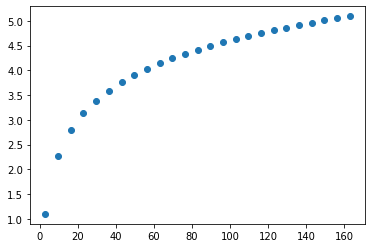

In [240]:
a = list()
ln_a = list()
for _ in np.linspace(3, x_bar, num=m_X):
    a.append(_)
    ln_a.append(math.log(_))

b = list()
ln_b = list()
for _ in np.linspace(3, y_bar, num=m_Y):
    b.append(_)
    ln_b.append(math.log(_))

t_X = list()
for j in range(0, m_X-1):
    t_X.append((ln_a[j+1] - ln_a[j]) / (a[j+1] - a[j]))

t_Y = list()
for j in range(0, m_Y-1):
    t_Y.append((ln_b[j+1] - ln_b[j]) / (b[j+1] - b[j]))

plt.scatter(a, ln_a)




In [241]:
model = gp.Model("cutting_stock")

In [242]:
x = model.addVar(lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="x")
y = model.addVar(lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="y")
x_prime = model.addVars(J, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="x_prime")
y_prime = model.addVars(J, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="y_prime")
s = model.addVars(J, vtype=GRB.BINARY, name="s")
u = model.addVars(J, J, vtype=GRB.BINARY, name="u")
v = model.addVars(J, J, vtype=GRB.BINARY, name="v")
alpha_X = model.addVars(m_X, lb=0.0, ub=1.0, vtype=GRB.BINARY, name="alpha_X")
alpha_Y = model.addVars(m_Y, lb=0.0, ub=1.0, vtype=GRB.BINARY, name="alpha_Y")
beta_X = model.addVars(m_X, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="beta_X")
beta_Y = model.addVars(m_Y, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="beta_Y")



In [243]:
model.setObjective(
    ln_a[0] + t_X[0] * (x - a[0]) + \
    gp.quicksum((t_X[j] - t_X[j-1]) * (a[j] * alpha_X[j] + x - a[j] - beta_X[j]) for j in range(1, m_X-1)) + \
    ln_b[0] + t_Y[0] * (y - b[0]) + \
    gp.quicksum((t_Y[j] - t_Y[j-1]) * (b[j] * alpha_Y[j] + y - b[j] - beta_Y[j]) for j in range(1, m_Y-1))
)

In [244]:
model.addConstrs(-x_bar * alpha_X[j] <= x - a[j] for j in range(1, m_X))
model.addConstrs(x - a[j] <= x_bar * (1 - alpha_X[j]) for j in range(1, m_X))
model.addConstrs(-x_bar * alpha_X[j] <= beta_X[j] for j in range(1, m_X))
model.addConstrs(beta_X[j] <= x_bar * alpha_X[j] for j in range(1, m_X))
model.addConstrs(x_bar * (alpha_X[j] - 1) + x <= beta_X[j] for j in range(1, m_X))
model.addConstrs(beta_X[j] <= x_bar * (1 - alpha_X[j]) + x for j in range(1, m_X))
model.addConstrs(alpha_X[j] <= alpha_X[j-1] for j in range(1, m_X))



model.addConstrs(-y_bar * alpha_Y[j] <= y - b[j] for j in range(1, m_Y))
model.addConstrs(y - b[j] <= y_bar * (1 - alpha_Y[j]) for j in range(1, m_Y))
model.addConstrs(-y_bar * alpha_Y[j] <= beta_Y[j] for j in range(1, m_Y))
model.addConstrs(beta_Y[j] <= y_bar * alpha_Y[j] for j in range(1, m_Y))
model.addConstrs(y_bar * (alpha_Y[j] - 1) + y <= beta_Y[j] for j in range(1, m_Y))
model.addConstrs(beta_Y[j] <= y_bar * (1 - alpha_Y[j]) + y for j in range(1, m_Y))
model.addConstrs(alpha_Y[j] <= alpha_Y[j-1] for j in range(1, m_Y))




model.addConstrs(
    (x_prime[i] - x_prime[k]) + u[i,k] * x_bar + v[i,k] * x_bar >= \
    0.5 * (P[i] * s[i] + Q[i] * (1 - s[i]) + P[k] * s[k] + Q[k] * (1 - s[k])) \
    for i in range(J) for k in range(J) if i != k
    )


model.addConstrs(
    (x_prime[k] - x_prime[i]) + (1 - u[i,k]) * x_bar + v[i,k] * x_bar >= \
    0.5 * (P[i] * s[i] + Q[i] * (1 - s[i]) + P[k] * s[k] + Q[k] * (1 - s[k])) \
    for i in range(J) for k in range(J) if i != k
    )

model.addConstrs(
    (y_prime[i] - y_prime[k]) + u[i,k] * y_bar + (1 - v[i,k]) * y_bar >= \
    0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i] + P[k] * (1 - s[k]) + Q[k] * s[k]) \
    for i in range(J) for k in range(J) if i != k
    )

model.addConstrs(
    (y_prime[k] - y_prime[i]) + (1 - u[i,k]) * y_bar + (1 - v[i,k]) * y_bar >= \
    0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i] + P[k] * (1 - s[k]) + Q[k] * s[k]) \
    for i in range(J) for k in range(J) if i != k
    )

model.addConstr(x_bar >= x)
model.addConstrs(x >= x_prime[i] + 0.5 * (P[i] * s[i] + Q[i] * (1 - s[i])) for i in range(J))
model.addConstr(y_bar >= y)
model.addConstrs(y >= y_prime[i] + 0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i]) for i in range(J))

model.addConstrs(x_prime[i] - 0.5 * (P[i] * s[i] + Q[i] * (1 - s[i])) >= 0 for i in range(J))
model.addConstrs(y_prime[i] - 0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i]) >= 0 for i in range(J))

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>}

In [245]:
model.write('q3.lp')

model.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 32 physical cores, 64 logical processors, using up to 32 threads
Optimize a model with 914 rows, 426 columns and 3598 nonzeros
Model fingerprint: 0x4c9324df
Variable types: 76 continuous, 350 integer (350 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [3e-04, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 3e+02]
Presolve removed 344 rows and 127 columns
Presolve time: 0.01s
Presolved: 570 rows, 299 columns, 2826 nonzeros
Variable types: 26 continuous, 273 integer (273 binary)

Root relaxation: objective 4.417979e+00, 185 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    4.41798    0  140          -    4.41798      -     -    0s
H    0     0                       7.2454266    4.41798  39.0%     -    0s

Cutting planes:

### (c)

4.0 7.999999999999943
4.0 23.999999999989072
4.0 39.99999999997787
4.0 55.99999999996746
4.5 68.49999999995663
4.5 77.49999999994688
4.5 86.49999999993867
4.5 95.4999999999302
4.5 104.49999999992195
1.5 117.9999999999144
4.499999999999746 117.99999999991462
7.49999999999952 117.99999999991479


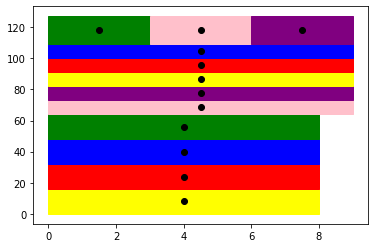

In [246]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
colors = ['yellow', 'red', 'blue', 'green', 'pink', 'purple']
xs = list()
ys = list()
for j in range(J):
    center_x, center_y = model.getAttr('x', x_prime)[j], model.getAttr('x', y_prime)[j]
    print(center_x, center_y)
    xs.append(center_x)
    ys.append(center_y)
    if model.getAttr('x', s)[j] == 1: # p和x平行
        corner_x = center_x - 0.5 * P[j]
        corner_y = center_y - 0.5 * Q[j]
        ax.add_patch(Rectangle((corner_x, corner_y), P[j], Q[j], color=colors[j%len(colors)]))
    else: # p和y平行
        corner_x = center_x - 0.5 * Q[j]
        corner_y = center_y - 0.5 * P[j]
        ax.add_patch(Rectangle((corner_x, corner_y), Q[j], P[j], color=colors[j%len(colors)]))
    # break
ax.scatter(xs, ys, c='black', zorder=100)


### (d)

In [265]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
import math
import numpy as np
import time 

In [266]:
def q3_4(resolution):
    start = time.time()
    P = [8] * 4 + [9] * 5 + [18] * 3
    Q = [16] * 4 + [9] * 5 + [3] * 3
    x_bar = 18 * 3 + 9 * 5 + 16 * 4
    y_bar = 18 * 3 + 9 * 5 + 16 * 4

    J = len(P)
    m_X = resolution
    m_Y = resolution

    a = list()
    ln_a = list()
    for _ in np.linspace(3, x_bar, num=m_X):
        a.append(_)
        ln_a.append(math.log(_))

    b = list()
    ln_b = list()
    for _ in np.linspace(3, y_bar, num=m_Y):
        b.append(_)
        ln_b.append(math.log(_))

    t_X = list()
    for j in range(0, m_X-1):
        t_X.append((ln_a[j+1] - ln_a[j]) / (a[j+1] - a[j]))

    t_Y = list()
    for j in range(0, m_Y-1):
        t_Y.append((ln_b[j+1] - ln_b[j]) / (b[j+1] - b[j]))







    model = gp.Model("cutting_stock")
    x = model.addVar(lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="x")
    y = model.addVar(lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="y")
    x_prime = model.addVars(J, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="x_prime")
    y_prime = model.addVars(J, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="y_prime")
    s = model.addVars(J, vtype=GRB.BINARY, name="s")
    u = model.addVars(J, J, vtype=GRB.BINARY, name="u")
    v = model.addVars(J, J, vtype=GRB.BINARY, name="v")
    alpha_X = model.addVars(m_X, lb=0.0, ub=1.0, vtype=GRB.BINARY, name="alpha_X")
    alpha_Y = model.addVars(m_Y, lb=0.0, ub=1.0, vtype=GRB.BINARY, name="alpha_Y")
    beta_X = model.addVars(m_X, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="beta_X")
    beta_Y = model.addVars(m_Y, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="beta_Y")

    model.setObjective(
        ln_a[0] + t_X[0] * (x - a[0]) + \
        gp.quicksum((t_X[j] - t_X[j-1]) * (a[j] * alpha_X[j] + x - a[j] - beta_X[j]) for j in range(1, m_X-1)) + \
        ln_b[0] + t_Y[0] * (y - b[0]) + \
        gp.quicksum((t_Y[j] - t_Y[j-1]) * (b[j] * alpha_Y[j] + y - b[j] - beta_Y[j]) for j in range(1, m_Y-1))
    )

    model.addConstrs(-x_bar * alpha_X[j] <= x - a[j] for j in range(1, m_X))
    model.addConstrs(x - a[j] <= x_bar * (1 - alpha_X[j]) for j in range(1, m_X))
    model.addConstrs(-x_bar * alpha_X[j] <= beta_X[j] for j in range(1, m_X))
    model.addConstrs(beta_X[j] <= x_bar * alpha_X[j] for j in range(1, m_X))
    model.addConstrs(x_bar * (alpha_X[j] - 1) + x <= beta_X[j] for j in range(1, m_X))
    model.addConstrs(beta_X[j] <= x_bar * (1 - alpha_X[j]) + x for j in range(1, m_X))
    model.addConstrs(alpha_X[j] <= alpha_X[j-1] for j in range(1, m_X))



    model.addConstrs(-y_bar * alpha_Y[j] <= y - b[j] for j in range(1, m_Y))
    model.addConstrs(y - b[j] <= y_bar * (1 - alpha_Y[j]) for j in range(1, m_Y))
    model.addConstrs(-y_bar * alpha_Y[j] <= beta_Y[j] for j in range(1, m_Y))
    model.addConstrs(beta_Y[j] <= y_bar * alpha_Y[j] for j in range(1, m_Y))
    model.addConstrs(y_bar * (alpha_Y[j] - 1) + y <= beta_Y[j] for j in range(1, m_Y))
    model.addConstrs(beta_Y[j] <= y_bar * (1 - alpha_Y[j]) + y for j in range(1, m_Y))
    model.addConstrs(alpha_Y[j] <= alpha_Y[j-1] for j in range(1, m_Y))




    model.addConstrs(
        (x_prime[i] - x_prime[k]) + u[i,k] * x_bar + v[i,k] * x_bar >= \
        0.5 * (P[i] * s[i] + Q[i] * (1 - s[i]) + P[k] * s[k] + Q[k] * (1 - s[k])) \
        for i in range(J) for k in range(J) if i != k
        )


    model.addConstrs(
        (x_prime[k] - x_prime[i]) + (1 - u[i,k]) * x_bar + v[i,k] * x_bar >= \
        0.5 * (P[i] * s[i] + Q[i] * (1 - s[i]) + P[k] * s[k] + Q[k] * (1 - s[k])) \
        for i in range(J) for k in range(J) if i != k
        )

    model.addConstrs(
        (y_prime[i] - y_prime[k]) + u[i,k] * y_bar + (1 - v[i,k]) * y_bar >= \
        0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i] + P[k] * (1 - s[k]) + Q[k] * s[k]) \
        for i in range(J) for k in range(J) if i != k
        )

    model.addConstrs(
        (y_prime[k] - y_prime[i]) + (1 - u[i,k]) * y_bar + (1 - v[i,k]) * y_bar >= \
        0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i] + P[k] * (1 - s[k]) + Q[k] * s[k]) \
        for i in range(J) for k in range(J) if i != k
        )

    model.addConstr(x_bar >= x)
    model.addConstrs(x >= x_prime[i] + 0.5 * (P[i] * s[i] + Q[i] * (1 - s[i])) for i in range(J))
    model.addConstr(y_bar >= y)
    model.addConstrs(y >= y_prime[i] + 0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i]) for i in range(J))

    model.addConstrs(x_prime[i] - 0.5 * (P[i] * s[i] + Q[i] * (1 - s[i])) >= 0 for i in range(J))
    model.addConstrs(y_prime[i] - 0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i]) >= 0 for i in range(J))

    model.optimize()
    print("objective value:", model.objVal)
    return model.objVal, time.time() - start


In [267]:
objs = list()
times = list()
for resolution in range(25, 30, 1):
    obj, t = q3_4(resolution)
    objs.append(obj)
    times.append(t)





Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 32 physical cores, 64 logical processors, using up to 32 threads
Optimize a model with 914 rows, 426 columns and 3598 nonzeros
Model fingerprint: 0x4c9324df
Variable types: 76 continuous, 350 integer (350 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [3e-04, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 3e+02]
Presolve removed 344 rows and 127 columns
Presolve time: 0.01s
Presolved: 570 rows, 299 columns, 2826 nonzeros
Variable types: 26 continuous, 273 integer (273 binary)

Root relaxation: objective 4.417979e+00, 185 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    4.41798    0  140          -    4.41798      -     -    0s
H    0     0                       7.2454266    4.41798  39.0%     -    0s

Cutting planes:

**隨著num of break point上升得到的objective value，x軸由25起算  
隨著對ln的精準度越高，objective value上升，因為原本用內插法就會低估了。**


隨著num of break point上升得到的objective value，x軸由25開始算


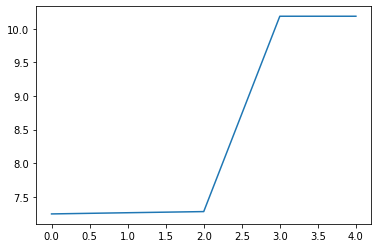

In [258]:
plt.plot(objs)

**隨著num of break point上升得到的execute time，x軸由25起算  
隨著對ln的精準度越高，執行速度變得更快。**


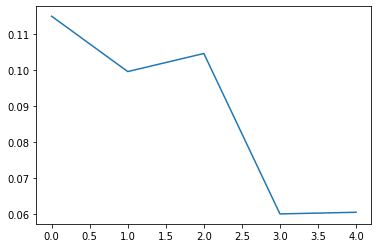

In [268]:
plt.plot(times)

In [264]:
times

[0.11371469497680664]